In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
def predict_gdp(model, year):
    year = np.array([[year]])
    predicted_gdp = model.predict(year)
    return predicted_gdp[0]

In [39]:
data = pd.read_csv('gdp_csv.csv')

country_code = input("Enter country code: ")
country_code_data = data[data["Country Code"] == country_code]

viable_years_set = country_code_data["Year"].unique()

In [40]:
if country_code_data.empty:
    raise BaseException("Country Code Not Found")

year_input = int(input("Enter year: "))

if year_input < viable_years_set.min():
    raise ValueError(f"Year must be >= minimal viable year ({viable_years_set.min()})")

ValueError: Year must be >= minimal viable year (1989)

In [22]:
X = country_code_data[['Year']].values
Y = country_code_data['Value']

model = LinearRegression()
model.fit(X, Y)

predicted_gdp = predict_gdp(model, year_input)

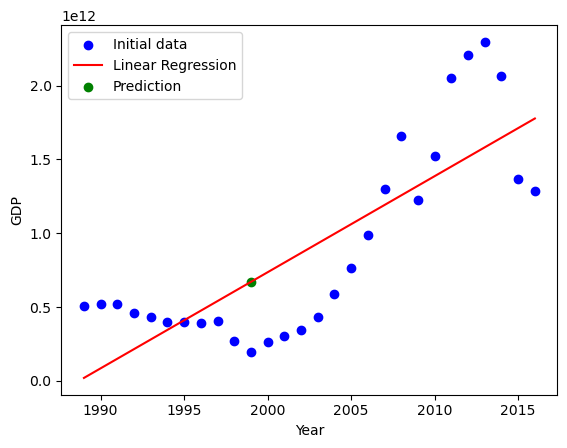

In [23]:
plt.scatter(X, Y, color='blue', label='Initial data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(year_input, predicted_gdp, color='green', label='Prediction')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [24]:
print(f"Predicted GDP for {country_code} in {year_input}: {predicted_gdp}")

Predicted GDP for RUS in 1999: 670463301515.0156
